## Customer Segmentation Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Download the dataset

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


Load the dataset into the tool

In [5]:
# importing the dataset

df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Visualizations :

Univariate Analysis

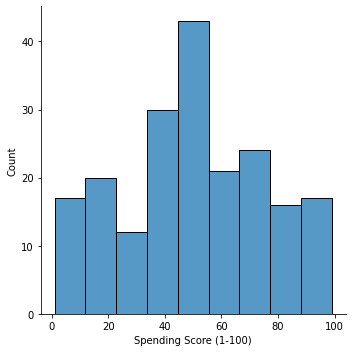

In [7]:
sns.displot(df["Spending Score (1-100)"])

Bi-Variate Analysis

In [8]:
sns.set(rc={'figure.figsize':(22,11)})

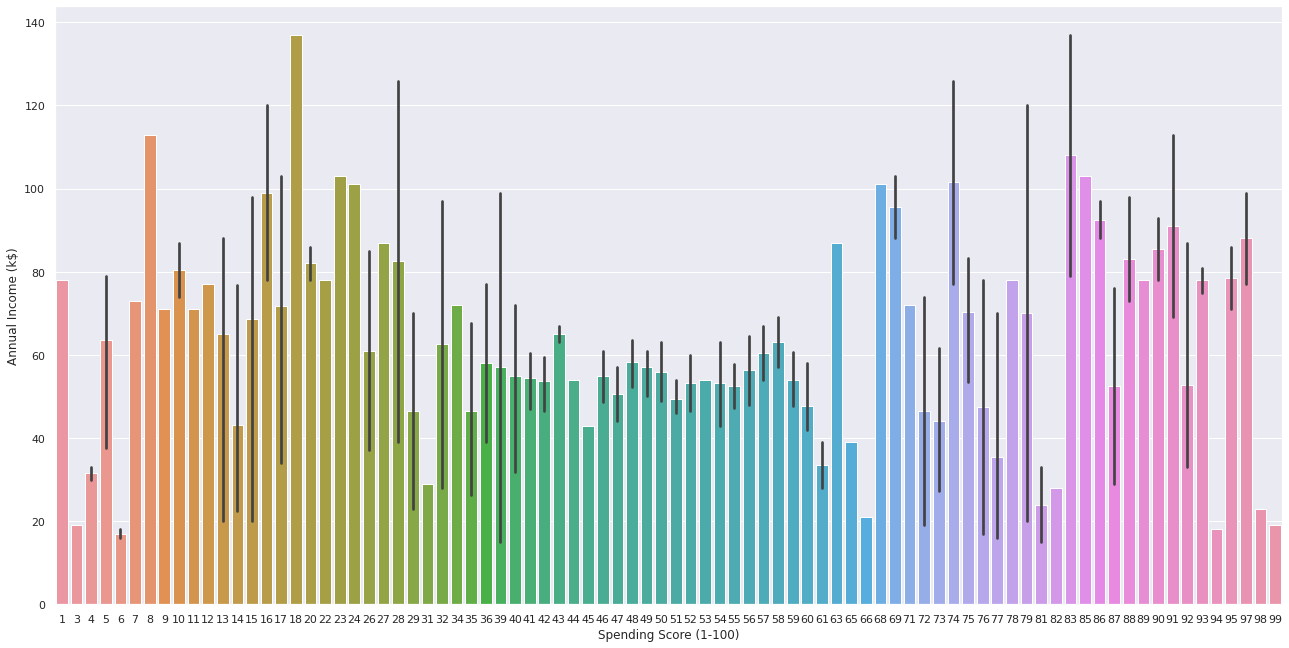

In [9]:
sns.barplot(x=df["Spending Score (1-100)"],y=df["Annual Income (k$)"])

Multi-Variate Analysis

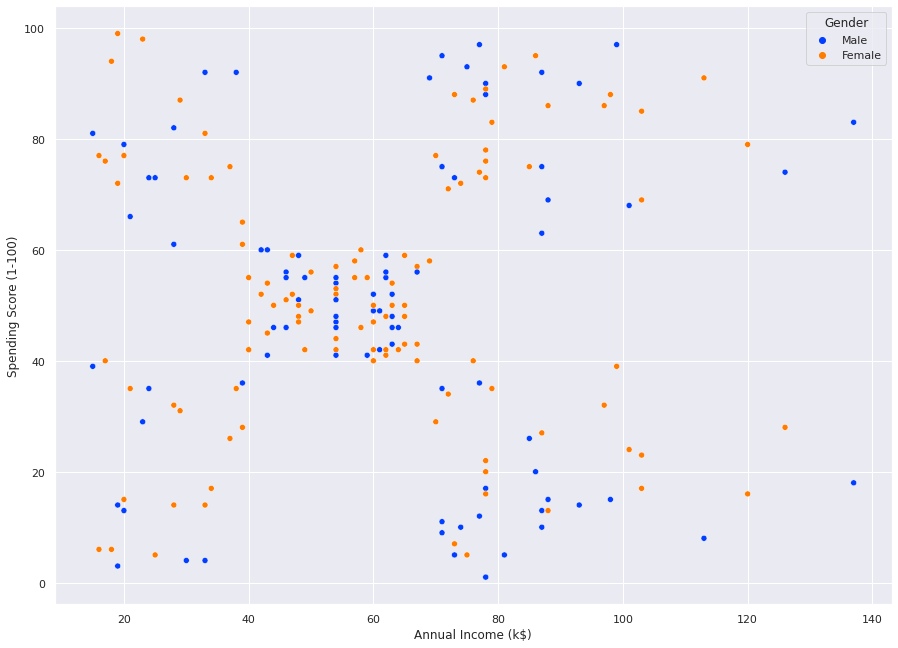

In [10]:
sns.set(rc={'figure.figsize':(15,11)})
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df,palette='bright',hue='Gender');

Perform descriptive statistics on the dataset.


In [11]:
df.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [12]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [13]:
df.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [14]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [15]:
df.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [16]:
df.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [17]:
df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [18]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

Check for Missing values and deal with them.


In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Find the outliers and replace them outliers

In [20]:
sorted(df["Annual Income (k$)"])

[15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 21,
 21,
 23,
 23,
 24,
 24,
 25,
 25,
 28,
 28,
 28,
 28,
 29,
 29,
 30,
 30,
 33,
 33,
 33,
 33,
 34,
 34,
 37,
 37,
 38,
 38,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 42,
 42,
 43,
 43,
 43,
 43,
 44,
 44,
 46,
 46,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 50,
 50,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 57,
 57,
 58,
 58,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 62,
 62,
 62,
 62,
 62,
 62,
 63,
 63,
 63,
 63,
 63,
 63,
 64,
 64,
 65,
 65,
 65,
 65,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 73,
 73,
 73,
 73,
 74,
 74,
 75,
 75,
 76,
 76,
 77,
 77,
 77,
 77,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 79,
 79,
 81,
 81,
 85,
 85,
 86,
 86,
 87,
 87,
 87,
 87,
 87,
 87,
 88,
 88,
 88,
 88,
 93,
 93,
 97,
 97,
 98,
 98,
 99,
 99,
 101,
 101,
 103,
 103,
 103,
 103,
 113,
 113,
 120,
 120,
 126,
 126

In [21]:
quantile1,quantile3=np.percentile(df["Annual Income (k$)"],[25,75])
print(quantile1,quantile3)

41.5 78.0


In [22]:
iqr=quantile3-quantile1
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)

In [23]:
print(lower_bound,upper_bound)

-13.25 132.75


Check for Categorical columns and perform encoding

In [24]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [25]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [26]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,0,34,103,23
191,192,0,32,103,69
192,193,1,33,113,8
193,194,0,38,113,91
194,195,0,47,120,16
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


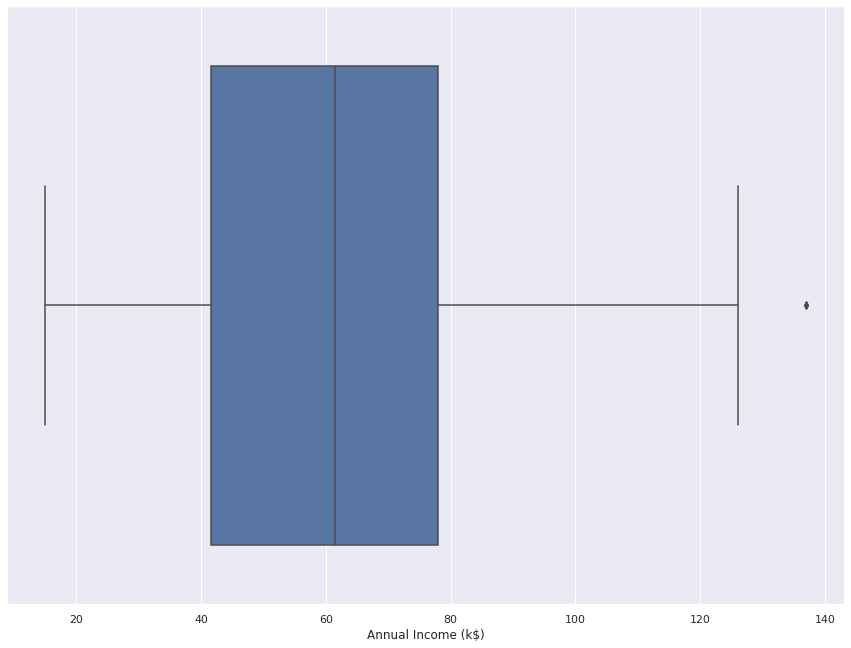

In [27]:
sns.set(rc={'figure.figsize':(15,11)})
sns.boxplot(x=df["Annual Income (k$)"])

 Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


Perform any of the clustering algorithms

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_


In [30]:
print(centroids)

[[ 97.5          0.45714286  42.81428571  59.54285714  50.51428571]
 [166.5          0.45588235  36.04411765  88.91176471  50.20588235]
 [ 31.5          0.40322581  37.4516129   30.61290323  49.83870968]]


 Split the data into dependent and independent variables

In [31]:
x= df.iloc[:,:-1].values
y= df.iloc[:,3].values

In [32]:
print(x)

[[  1   1  19  15]
 [  2   1  21  15]
 [  3   0  20  16]
 [  4   0  23  16]
 [  5   0  31  17]
 [  6   0  22  17]
 [  7   0  35  18]
 [  8   0  23  18]
 [  9   1  64  19]
 [ 10   0  30  19]
 [ 11   1  67  19]
 [ 12   0  35  19]
 [ 13   0  58  20]
 [ 14   0  24  20]
 [ 15   1  37  20]
 [ 16   1  22  20]
 [ 17   0  35  21]
 [ 18   1  20  21]
 [ 19   1  52  23]
 [ 20   0  35  23]
 [ 21   1  35  24]
 [ 22   1  25  24]
 [ 23   0  46  25]
 [ 24   1  31  25]
 [ 25   0  54  28]
 [ 26   1  29  28]
 [ 27   0  45  28]
 [ 28   1  35  28]
 [ 29   0  40  29]
 [ 30   0  23  29]
 [ 31   1  60  30]
 [ 32   0  21  30]
 [ 33   1  53  33]
 [ 34   1  18  33]
 [ 35   0  49  33]
 [ 36   0  21  33]
 [ 37   0  42  34]
 [ 38   0  30  34]
 [ 39   0  36  37]
 [ 40   0  20  37]
 [ 41   0  65  38]
 [ 42   1  24  38]
 [ 43   1  48  39]
 [ 44   0  31  39]
 [ 45   0  49  39]
 [ 46   0  24  39]
 [ 47   0  50  40]
 [ 48   0  27  40]
 [ 49   0  29  40]
 [ 50   0  31  40]
 [ 51   0  49  42]
 [ 52   1  33  42]
 [ 53   0  3

In [33]:
print(y)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]


Split the data into training and testing

In [34]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x, y = make_blobs(n_samples=1000)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(500, 2) (500, 2) (500,) (500,)


Building a model, Training and Testing

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
pd = knn.predict(x_test)

In [38]:
print(pd)

[2 1 1 2 1 1 1 0 1 1 1 0 1 0 1 2 2 0 1 1 0 0 1 0 1 2 1 2 0 1 0 0 1 1 2 0 0
 1 1 1 2 1 1 1 0 2 2 2 1 1 0 1 0 1 1 0 1 2 0 0 1 1 1 0 0 2 1 2 1 2 2 2 0 0
 1 2 0 1 1 0 0 1 0 1 1 1 2 1 0 0 0 2 1 2 2 0 1 0 1 0 0 1 2 0 2 1 1 0 0 1 0
 1 0 2 1 1 1 2 2 2 0 2 2 2 1 1 1 1 0 0 0 0 0 0 1 0 2 2 2 1 2 2 2 1 1 2 2 2
 1 0 0 2 0 0 0 0 2 1 0 1 2 1 1 0 0 1 1 1 1 0 0 2 0 1 2 1 2 0 1 1 1 0 0 0 1
 2 2 1 1 0 2 2 1 2 2 2 1 1 0 2 2 2 2 1 0 2 0 1 2 2 0 0 2 2 2 2 0 0 2 2 1 1
 2 0 2 0 0 2 0 2 2 0 1 2 2 1 0 2 0 0 1 0 1 0 0 1 2 1 1 0 1 1 2 1 0 0 0 2 0
 0 1 1 2 2 2 1 0 1 2 0 0 1 2 0 1 1 0 0 0 0 0 1 2 0 1 2 2 0 2 0 1 1 2 0 2 0
 0 2 0 2 0 1 1 2 2 0 2 0 2 1 1 1 0 0 0 2 1 2 2 2 1 1 0 2 1 1 0 2 2 2 1 1 1
 1 1 1 1 2 0 1 2 1 0 2 0 1 1 1 1 2 2 2 1 0 0 1 2 0 1 2 1 0 2 2 2 2 2 2 0 0
 1 2 0 2 2 1 2 1 2 1 0 0 0 2 2 2 2 2 2 2 2 0 1 2 1 0 0 2 0 1 2 0 2 0 2 1 0
 0 2 0 0 2 1 0 1 2 1 2 0 2 2 1 2 1 2 1 2 1 0 0 0 2 1 1 2 1 1 1 2 0 2 2 1 2
 2 0 2 2 1 1 1 0 0 1 1 0 1 1 1 0 2 1 0 2 1 1 1 2 0 1 0 1 1 1 1 2 0 2 0 0 1
 0 1 1 0 1 1 0 2 1 2 1 1 

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score",accuracy_score(y_test,pd))

Accuracy score 0.978


In [40]:
confusion_matrix(y_test,pd)

array([[155,   0,   0],
       [  0, 175,   4],
       [  0,   7, 159]])